In [1]:
import os
import numpy as np
import tensorflow as tf
from DataProcessing import DataProcessing
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
modelName = "12-24 22h45m59s (Experiment 13) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (Data Aug 3A) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)"
modelName = "12-24 21h00m19s (Experiment 12) CNN Model B (200 Epochs) (IEMOCAP EmoDB) (Data Aug 2A) (5 Emotions with Merge and Split 4 Ignore 2) (00001 lr 0001 decay)"
# modelName = "12-28 00h57m25s Optimal TrainedModel"
labelsToInclude = ['Anger', 'Frustration', 'Happiness', 'Neutral', 'Sadness']
splitDuration = 4
ignoreDuration = 2
transformByStft=False
hop_length = 512
win_length = 2048
n_mels = 128

# Load Model
print('Loading Model...')
modelDir = os.path.join(os.getcwd(), "models", modelName)
model = tf.keras.models.load_model(modelDir)
print('Model Loading Completed!\n')

# Load Data
dataModel = DataProcessing(labelsToInclude=labelsToInclude, splitDuration=splitDuration, ignoreDuration=ignoreDuration,
                           transformByStft=transformByStft, hop_length=hop_length, win_length=win_length, n_mels=n_mels)
dataModel.loadAndExtractTestData()
dataModel.processData()

Loading Model...


2022-12-29 14:35:32.517038: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model Loading Completed!

Loading and Extracting Data...
Data Loading and Extraction Completed!

Processing data...
Data Process Completed!



In [4]:
def visualizeMelSpec(mel_spectrogram, sr):
  librosa.display.specshow(mel_spectrogram, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')

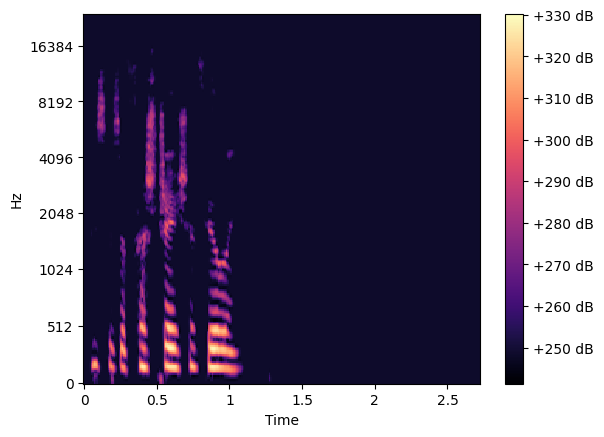

In [10]:
image = dataModel.x_test[0]
image = image.reshape(image.shape[0], image.shape[1])
visualizeMelSpec(image, dataModel.sr[0])

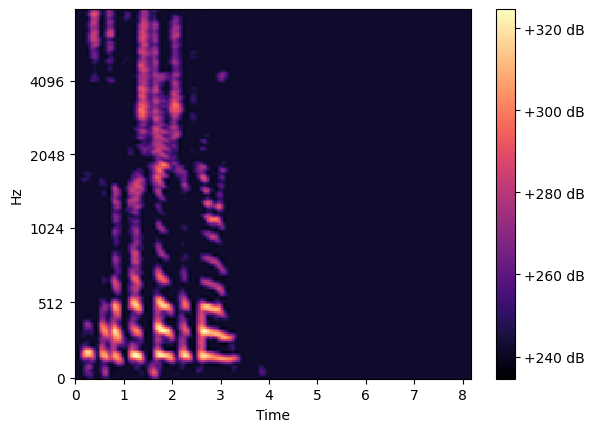

In [5]:
image = dataModel.x_test[0]
image = image.reshape(image.shape[0], image.shape[1])
visualizeMelSpec(image, dataModel.sr[0])